In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
original_image = cv2.imread("../images/tezja.jpeg")
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# tsza gdzieś tu dorobić zmniejszanie obrazka bo dla takich dużcyh 4000x3000 długo mieli długo z 2,5 min

#noiseless_image = cv2.fastNlMeansDenoisingColored(original_image,None,30,30,21,41)

#noiseless_image = cv2.blur(original_image,(10,10)) #do wyjebania
#noiseless_image = cv2.GaussianBlur(original_image,(21,21),0) # gaus też spoko
noiseless_image = cv2.medianBlur(original_image, 15)  # na razie top (default=15)
#noiseless_image = cv2.blur(original_image,(10,10)) # tu przetestować tego czwartego

vectorized = noiseless_image.reshape((-1, 3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 17  # (default = 17)
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

#noiseless_image_colored = cv2.fastNlMeansDenoisingColored(result_image,None,20,20,7,21)

result = cv2.imwrite('../images/tezja_medianblur3.jpg', result_image)


In [ ]:
plt.figure(figsize=(32, 18))
plt.imshow(img)
plt.show()

In [ ]:
plt.figure(figsize=(32, 18))
plt.imshow(result_image)
plt.show()

In [ ]:
plt.figure(figsize=(32, 18))
plt.imshow(noiseless_image)
plt.show()

In [1]:
from skimage.morphology import skeletonize
import numpy as np

# Define your binary matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=bool)

# Apply skeletonization
skeleton = skeletonize(matrix)

print("Original Matrix:\n", matrix.astype(int))
print("Skeletonized Matrix:\n", skeleton.astype(int))
import numpy as np

# Define your binary matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=bool)

# Apply skeletonization
skeleton = skeletonize(matrix)

print("Original Matrix:\n", matrix.astype(int))
print("Skeletonized Matrix:\n", skeleton.astype(int))

Original Matrix:
 [[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]]
Skeletonized Matrix:
 [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [74]:
result_image = cv2.imread("../images/out7.png")

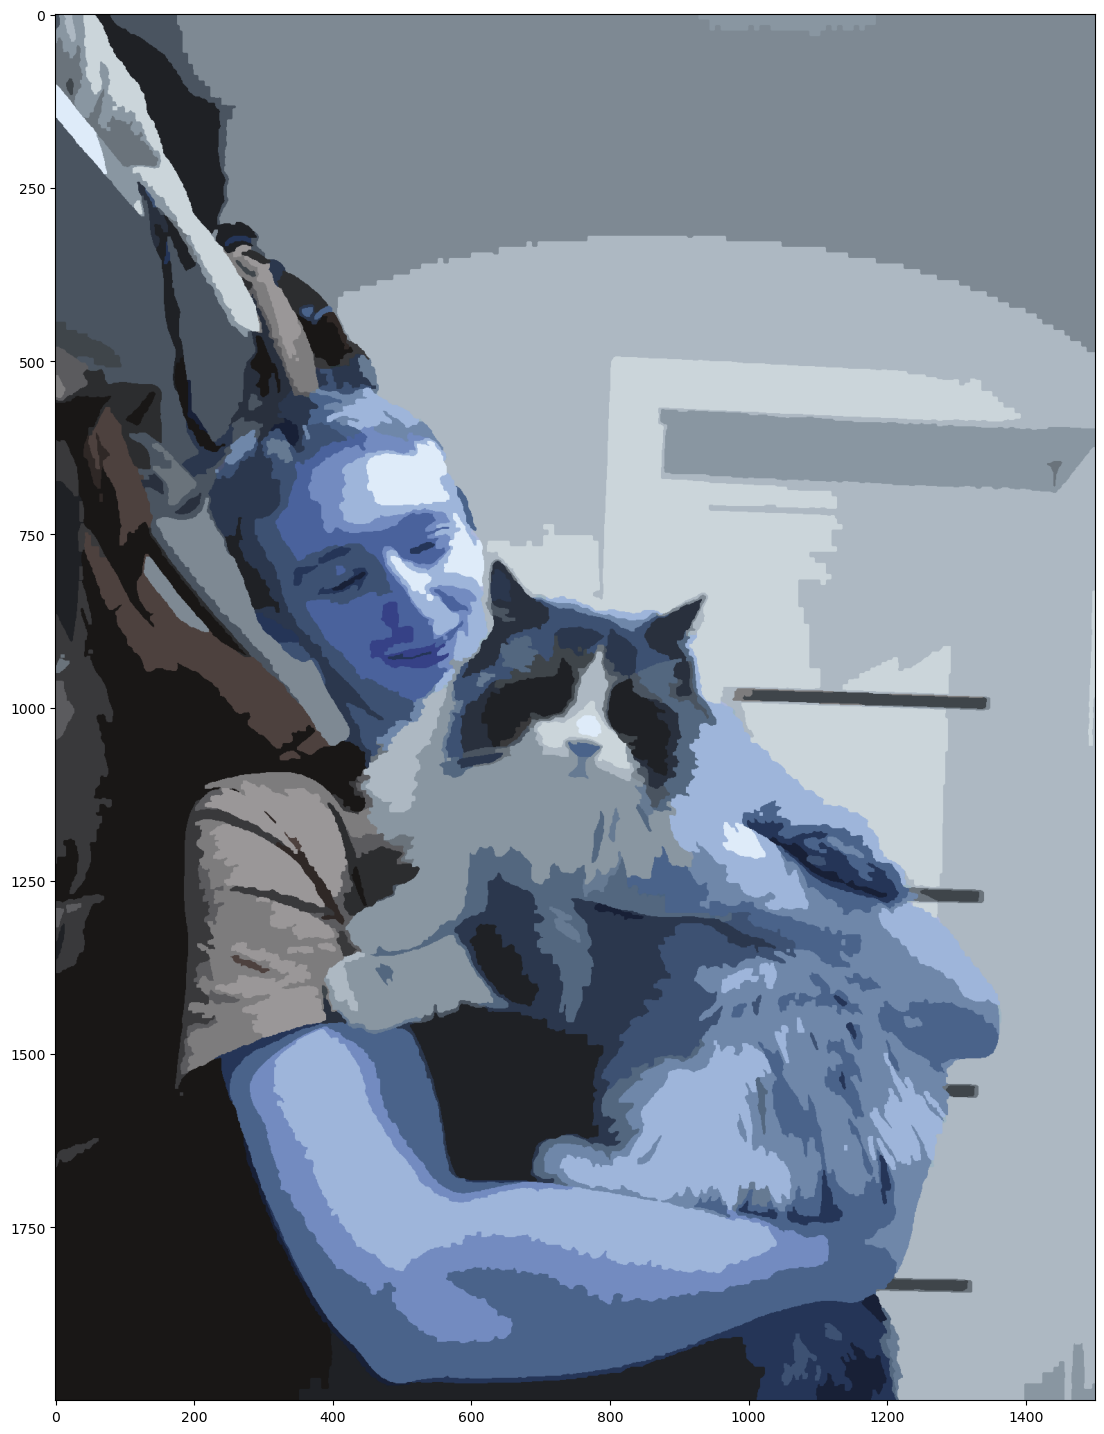

In [76]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(result_image, kernel, iterations=2)
output = cv2.dilate(erosion, kernel, iterations=2)

plt.figure(figsize=(32, 18))
plt.imshow(output)
plt.show()

In [23]:
# Borders
image_shape = result_image.shape
borders = np.zeros((image_shape[0], image_shape[1]))

# Vertical
for i in range(image_shape[0]):
    for j in range(image_shape[1] - 1):
        if not np.array_equal(result_image[i][j], result_image[i][j + 1]):
            borders[i][j] = 1

# Horizontal
for i in range(image_shape[0] - 1):
    for j in range(image_shape[1]):
        if not np.array_equal(result_image[i][j], result_image[i + 1][j]):
            borders[i][j] = 1

In [6]:
import numpy as np
from skimage import segmentation, color
import skimage
import matplotlib.pyplot as plt
import cv2

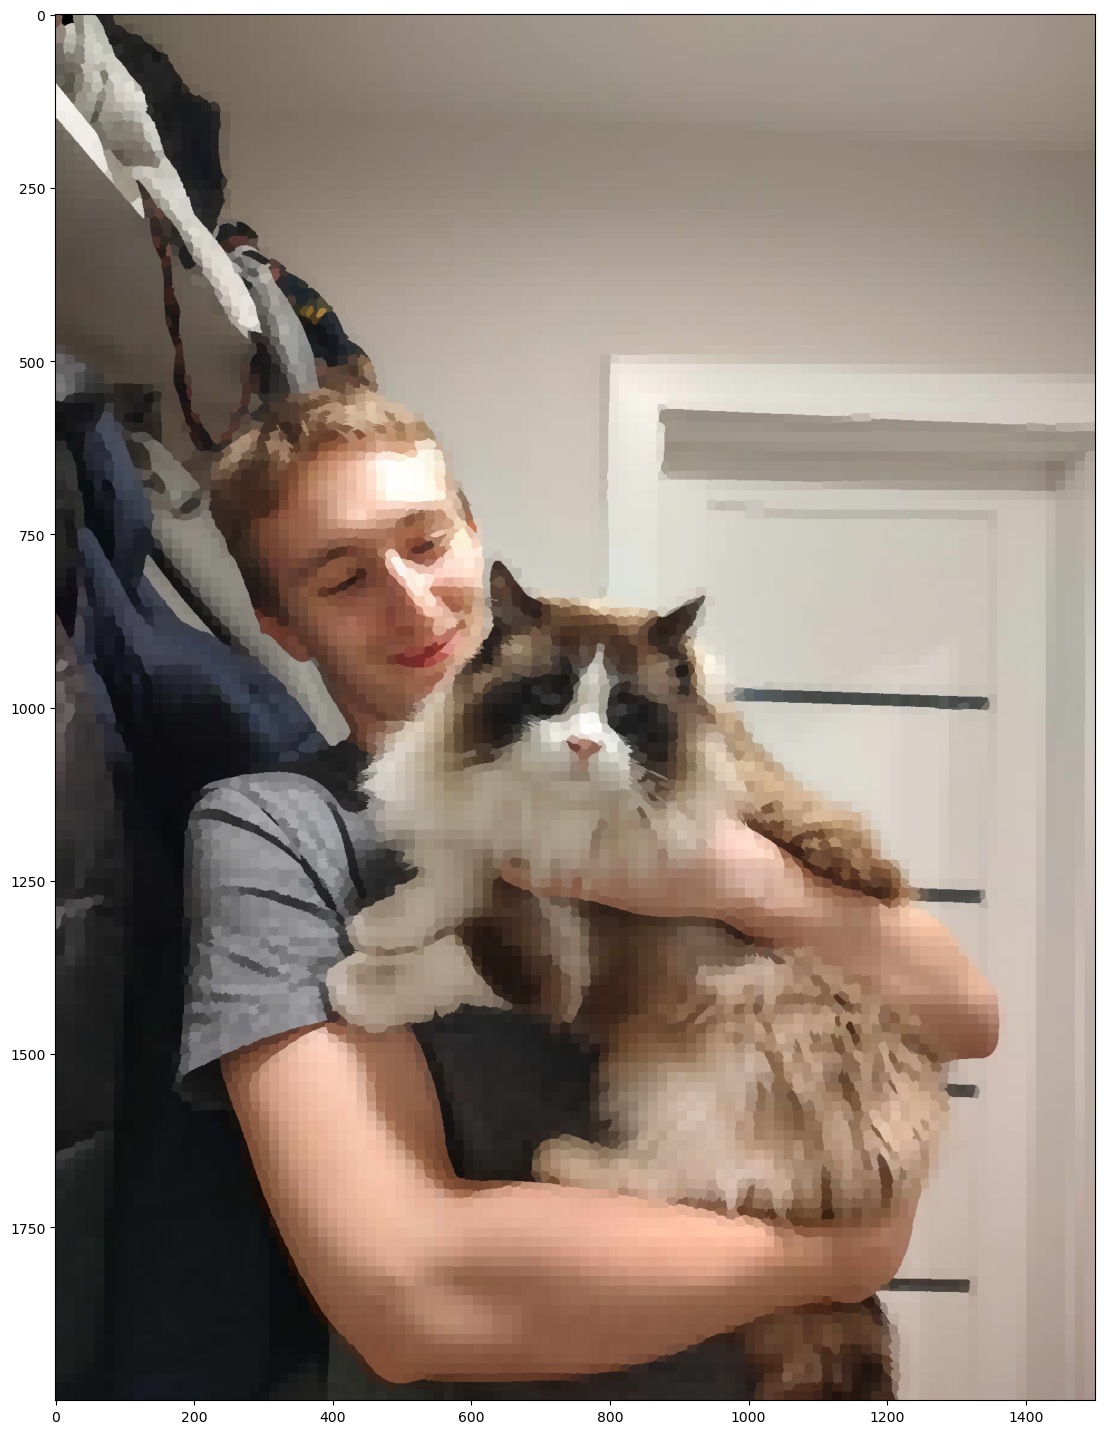

In [77]:
img = skimage.io.imread("../images/jakub.jpg")

labels1 = segmentation.slic(img, compactness=30, n_segments=15000, start_label=0)
#labels1 = segmentation.watershed(img)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=1)

plt.figure(figsize=(32, 18))
plt.imshow(out1)
plt.show()

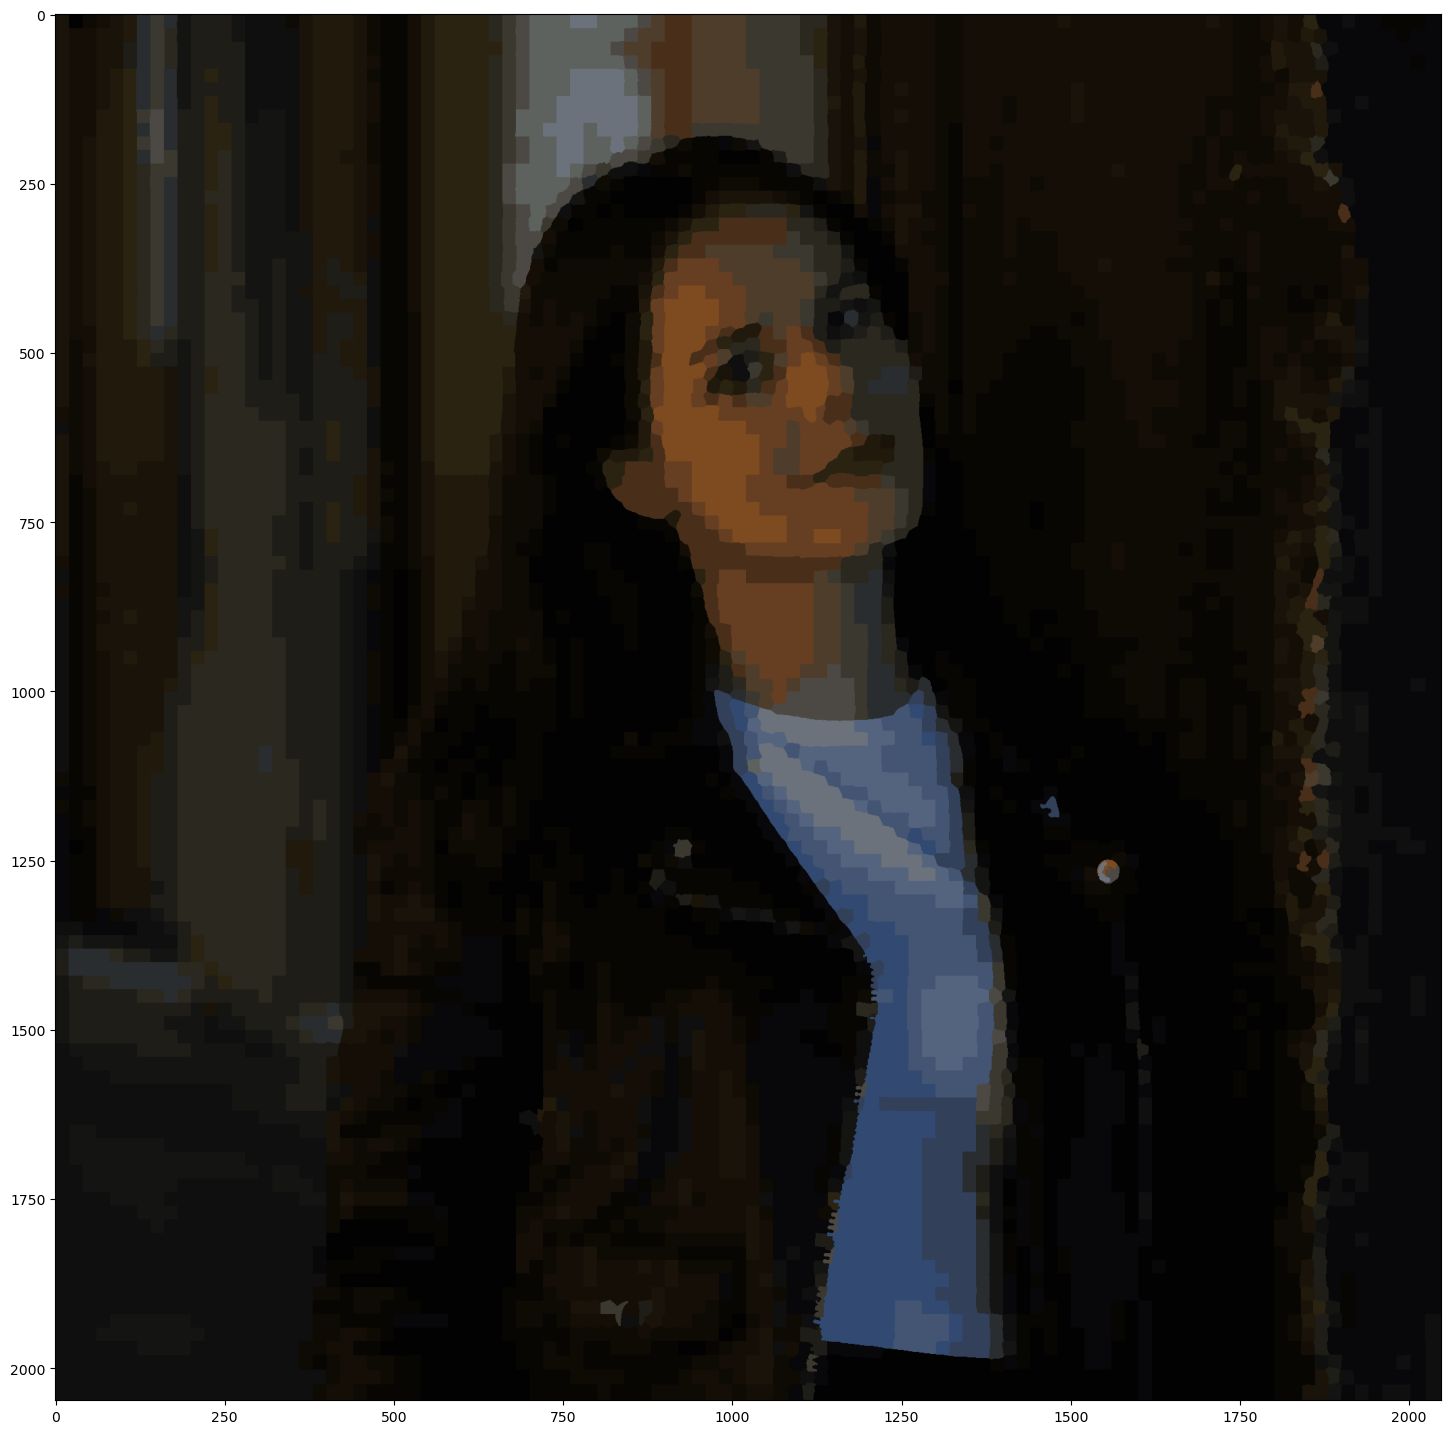

In [69]:
vectorized = out1.reshape((-1, 3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 25  # (default = 17)
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape(img.shape)

kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(result_image, kernel, iterations=2)
output = cv2.dilate(erosion, kernel, iterations=2)

plt.figure(figsize=(32, 18))
plt.imshow(output)
plt.show()

In [36]:
image_shape = result_image.shape
borders = np.zeros((image_shape[0], image_shape[1]))

# Vertical
for i in range(image_shape[0]):
    for j in range(image_shape[1] - 1):
        if not np.array_equal(result_image[i][j], result_image[i][j + 1]):
            borders[i][j] = 1

# Horizontal
for i in range(image_shape[0] - 1):
    for j in range(image_shape[1]):
        if not np.array_equal(result_image[i][j], result_image[i + 1][j]):
            borders[i][j] = 1

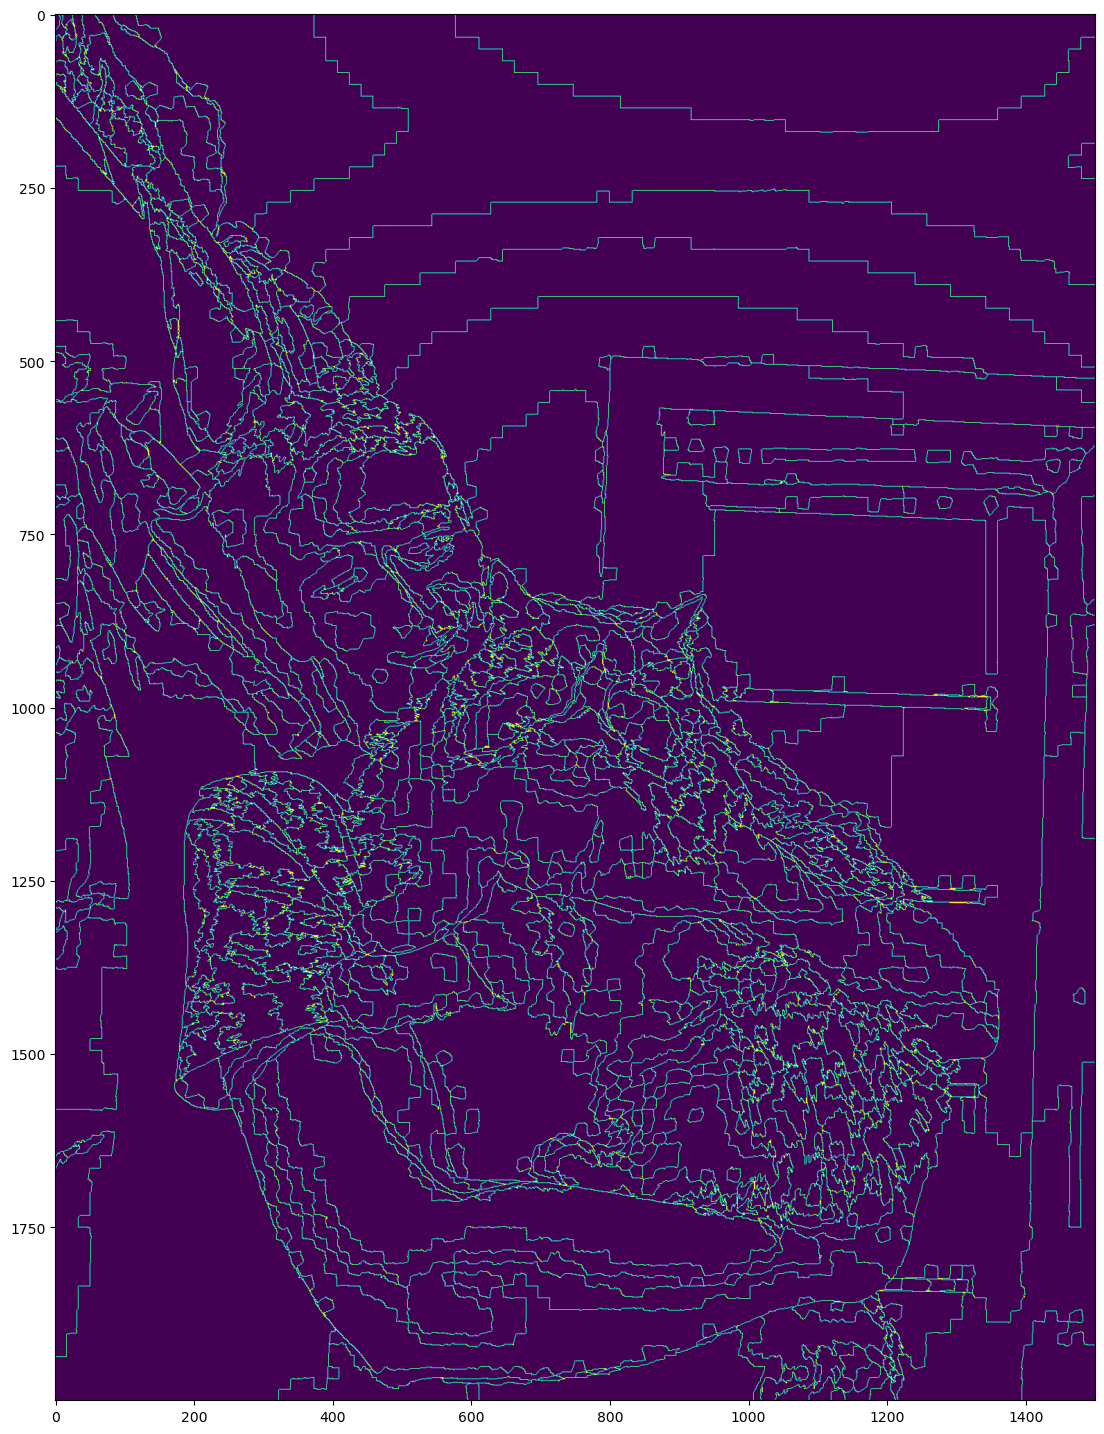

In [37]:
plt.figure(figsize=(32, 18))
plt.imshow(borders)
plt.show()

In [11]:
def return_colors(image):
    unique_colors = np.unique(image.reshape(-1, 3), axis=0)
    return unique_colors

In [12]:
colors = return_colors(result_image)

In [14]:
len(colors)

25

In [17]:
mask = cv2.inRange(result_image, colors[1], colors[1])

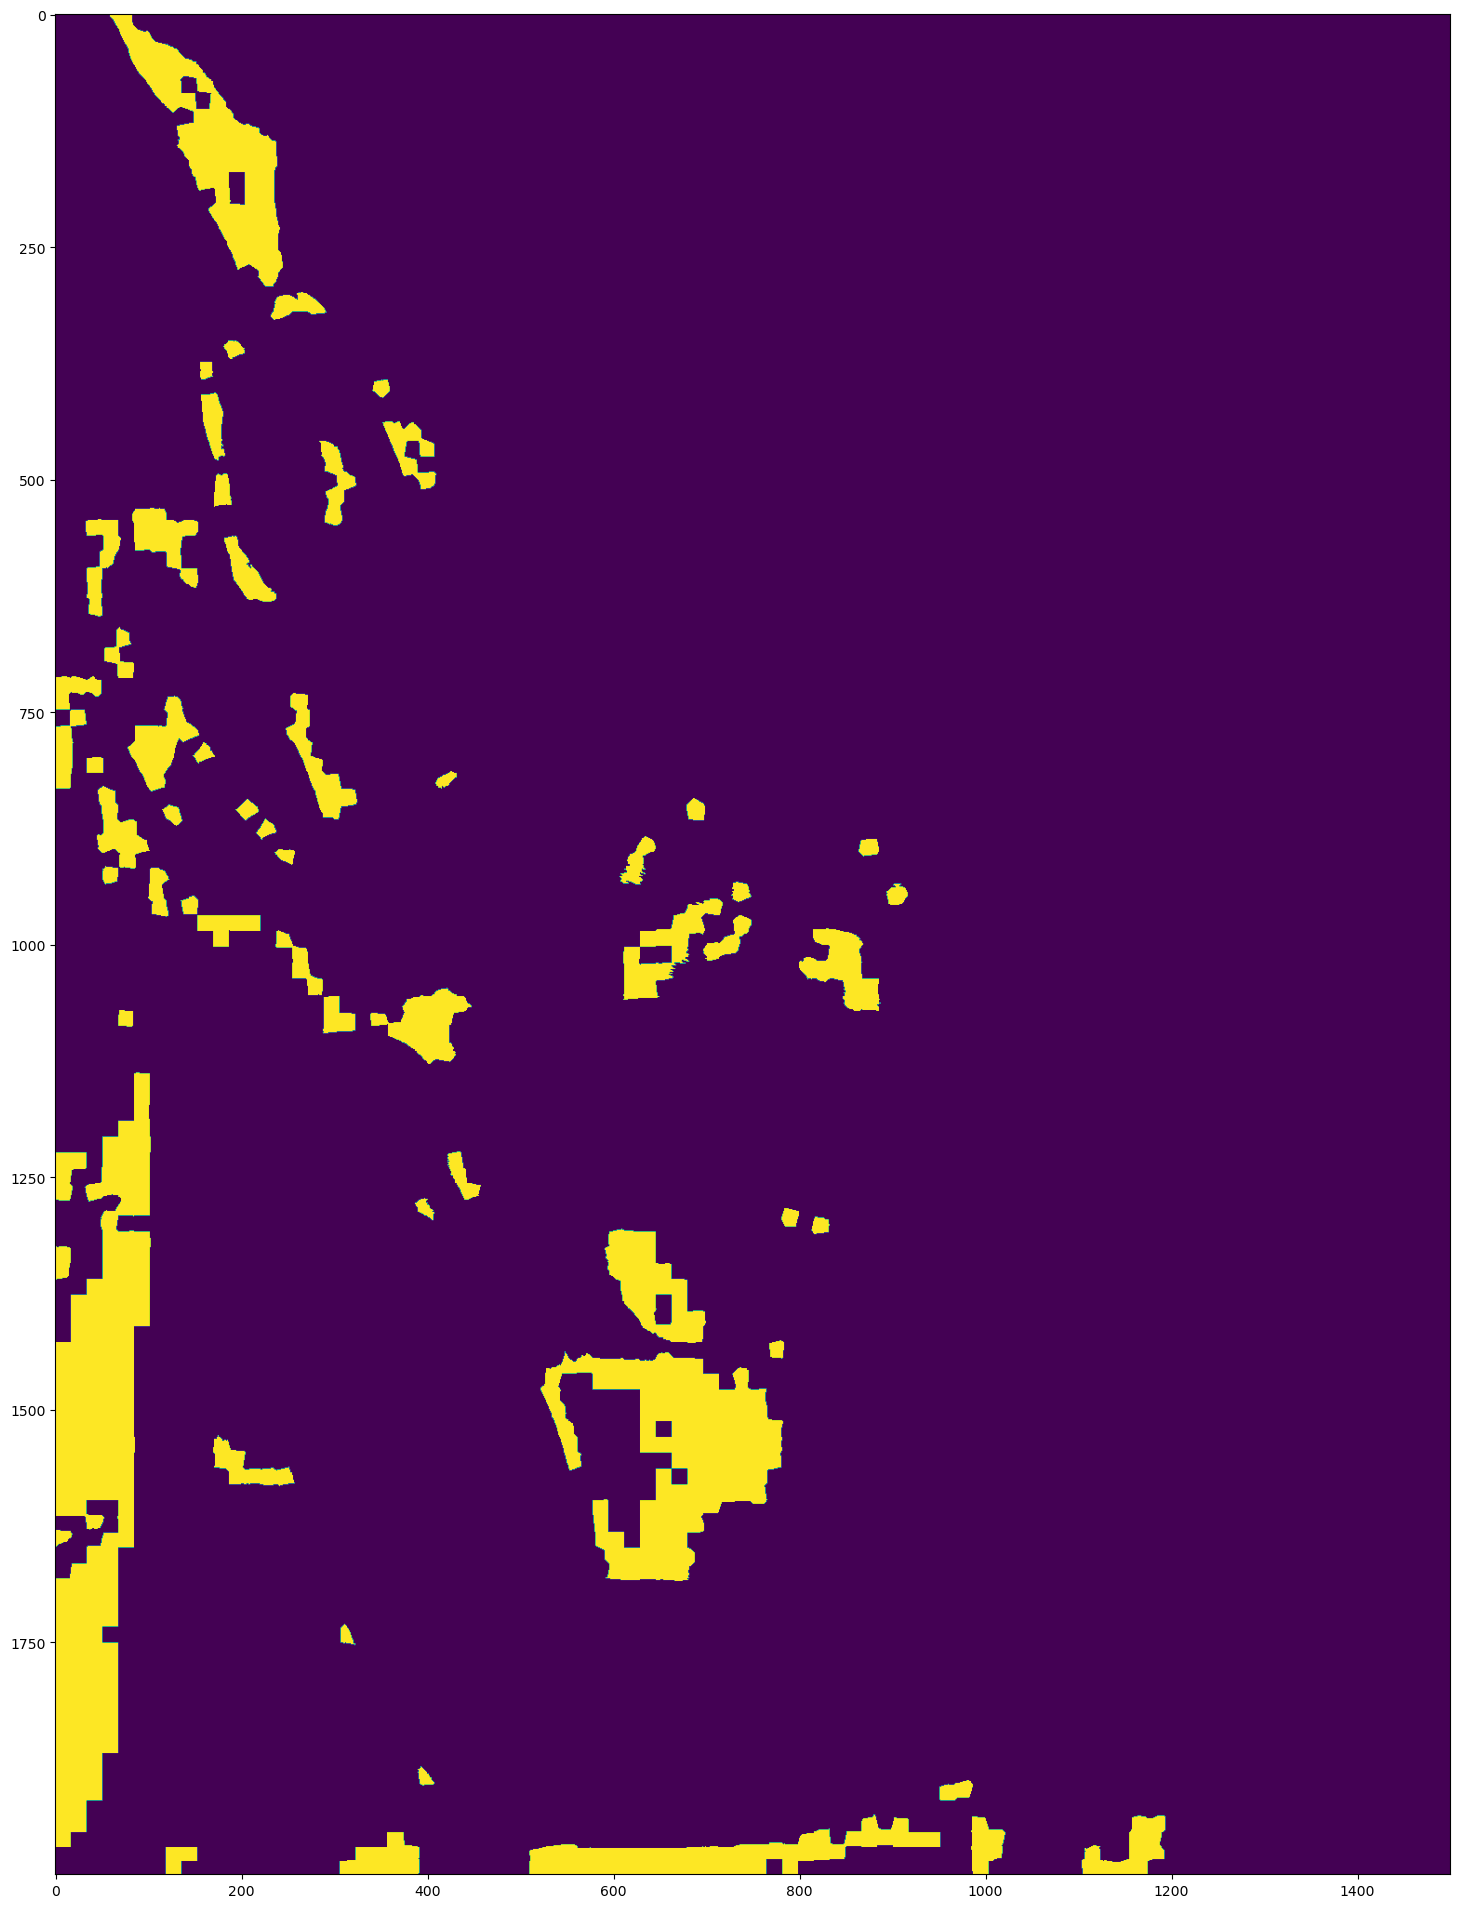

In [18]:
plt.figure(figsize=(18, 32))
plt.imshow(mask)

In [19]:
colored_output = cv2.bitwise_and(result_image, result_image, mask=mask)

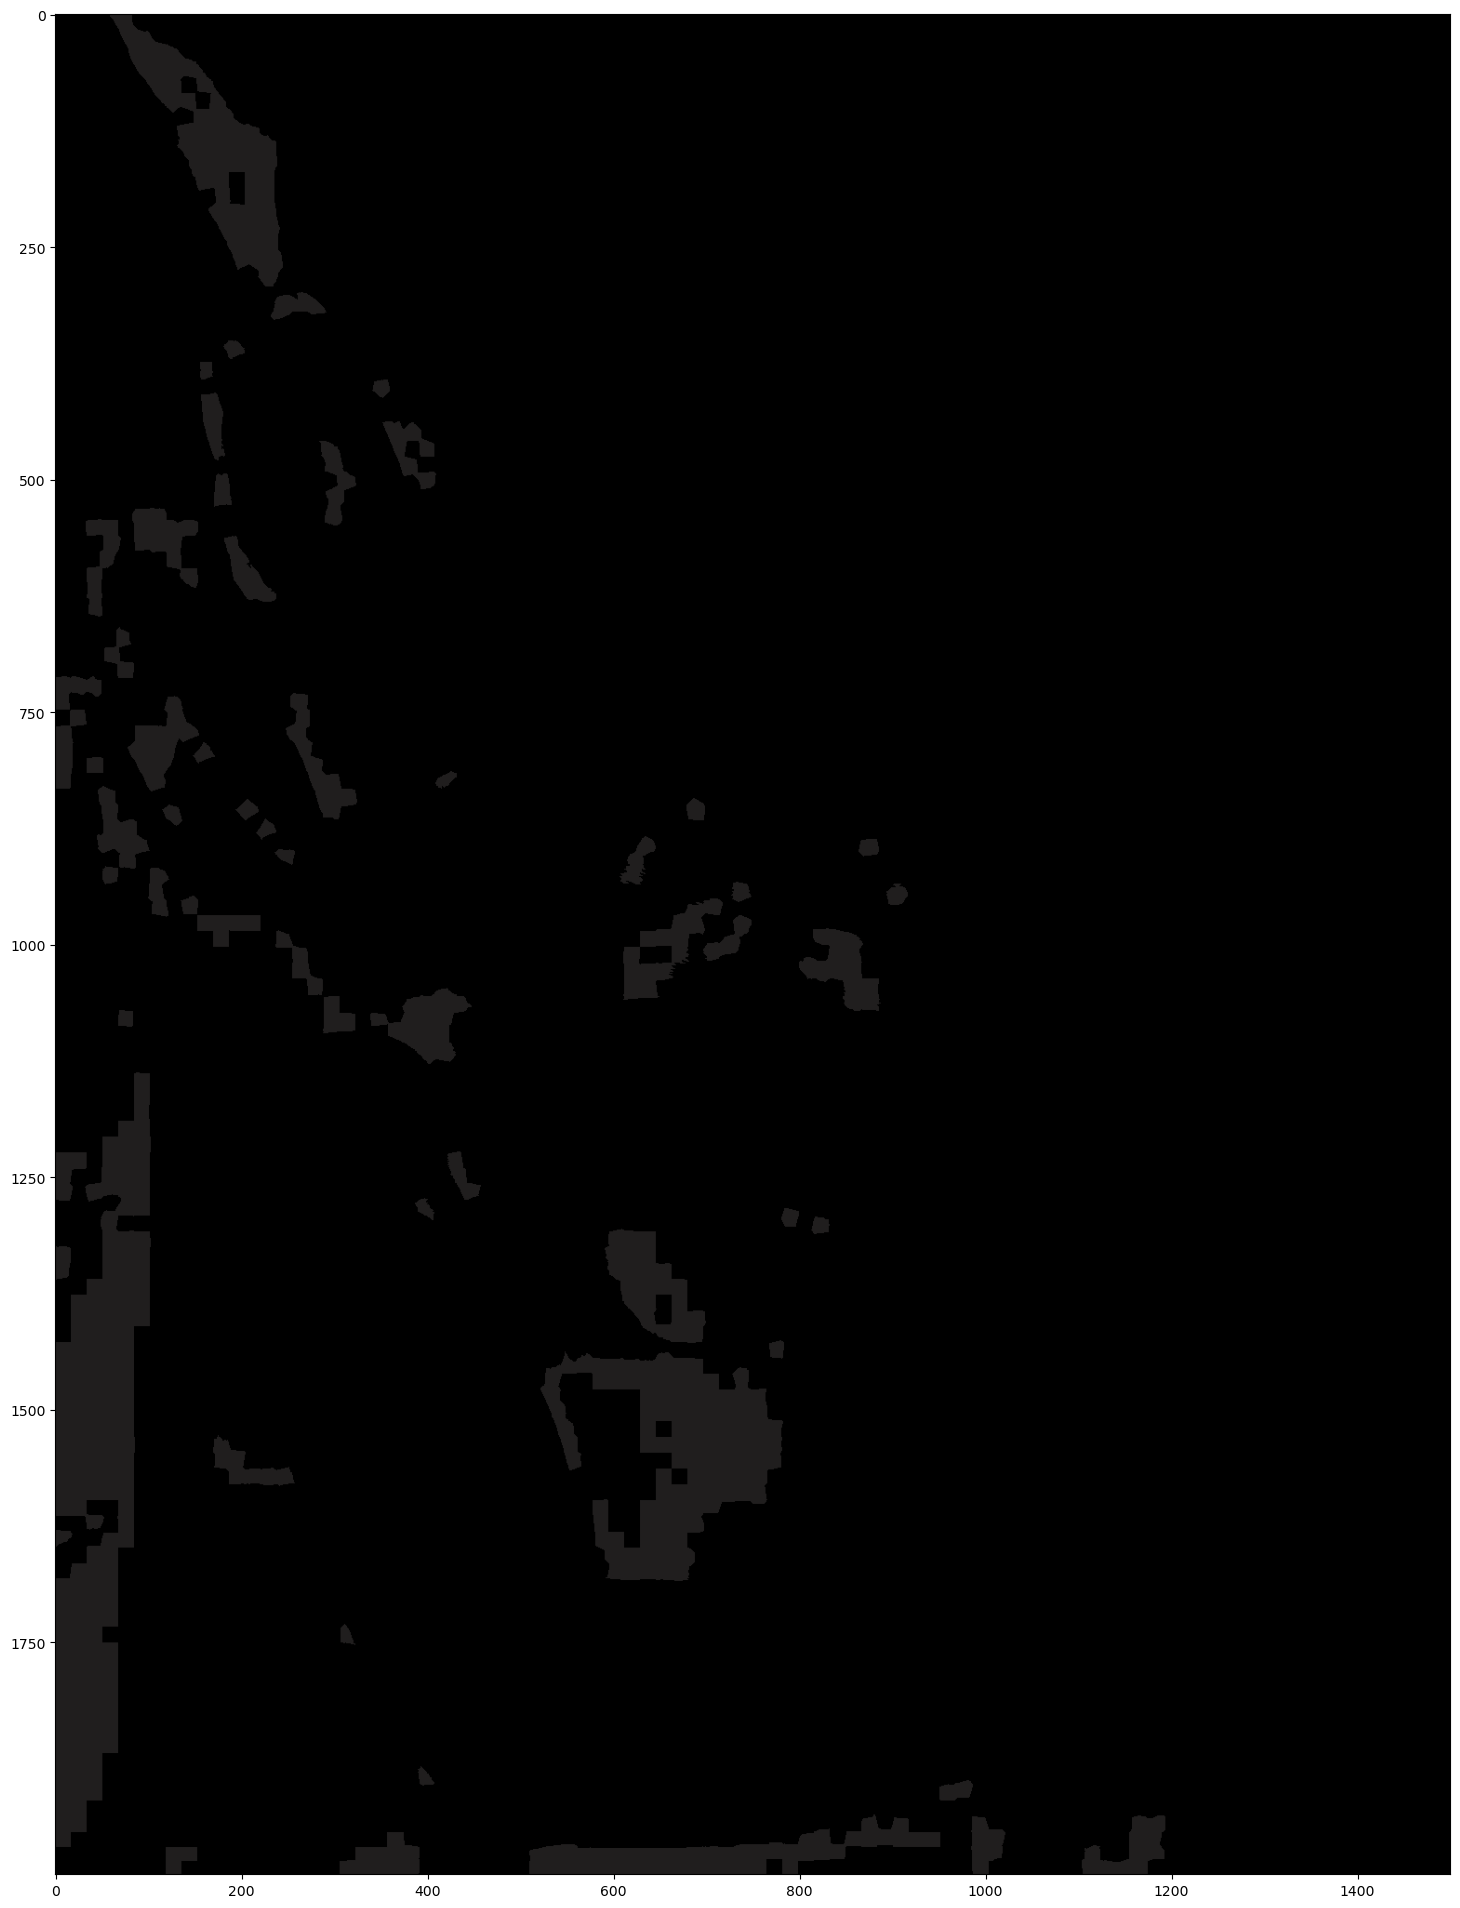

In [20]:
plt.figure(figsize=(18, 32))
plt.imshow(colored_output)

In [21]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

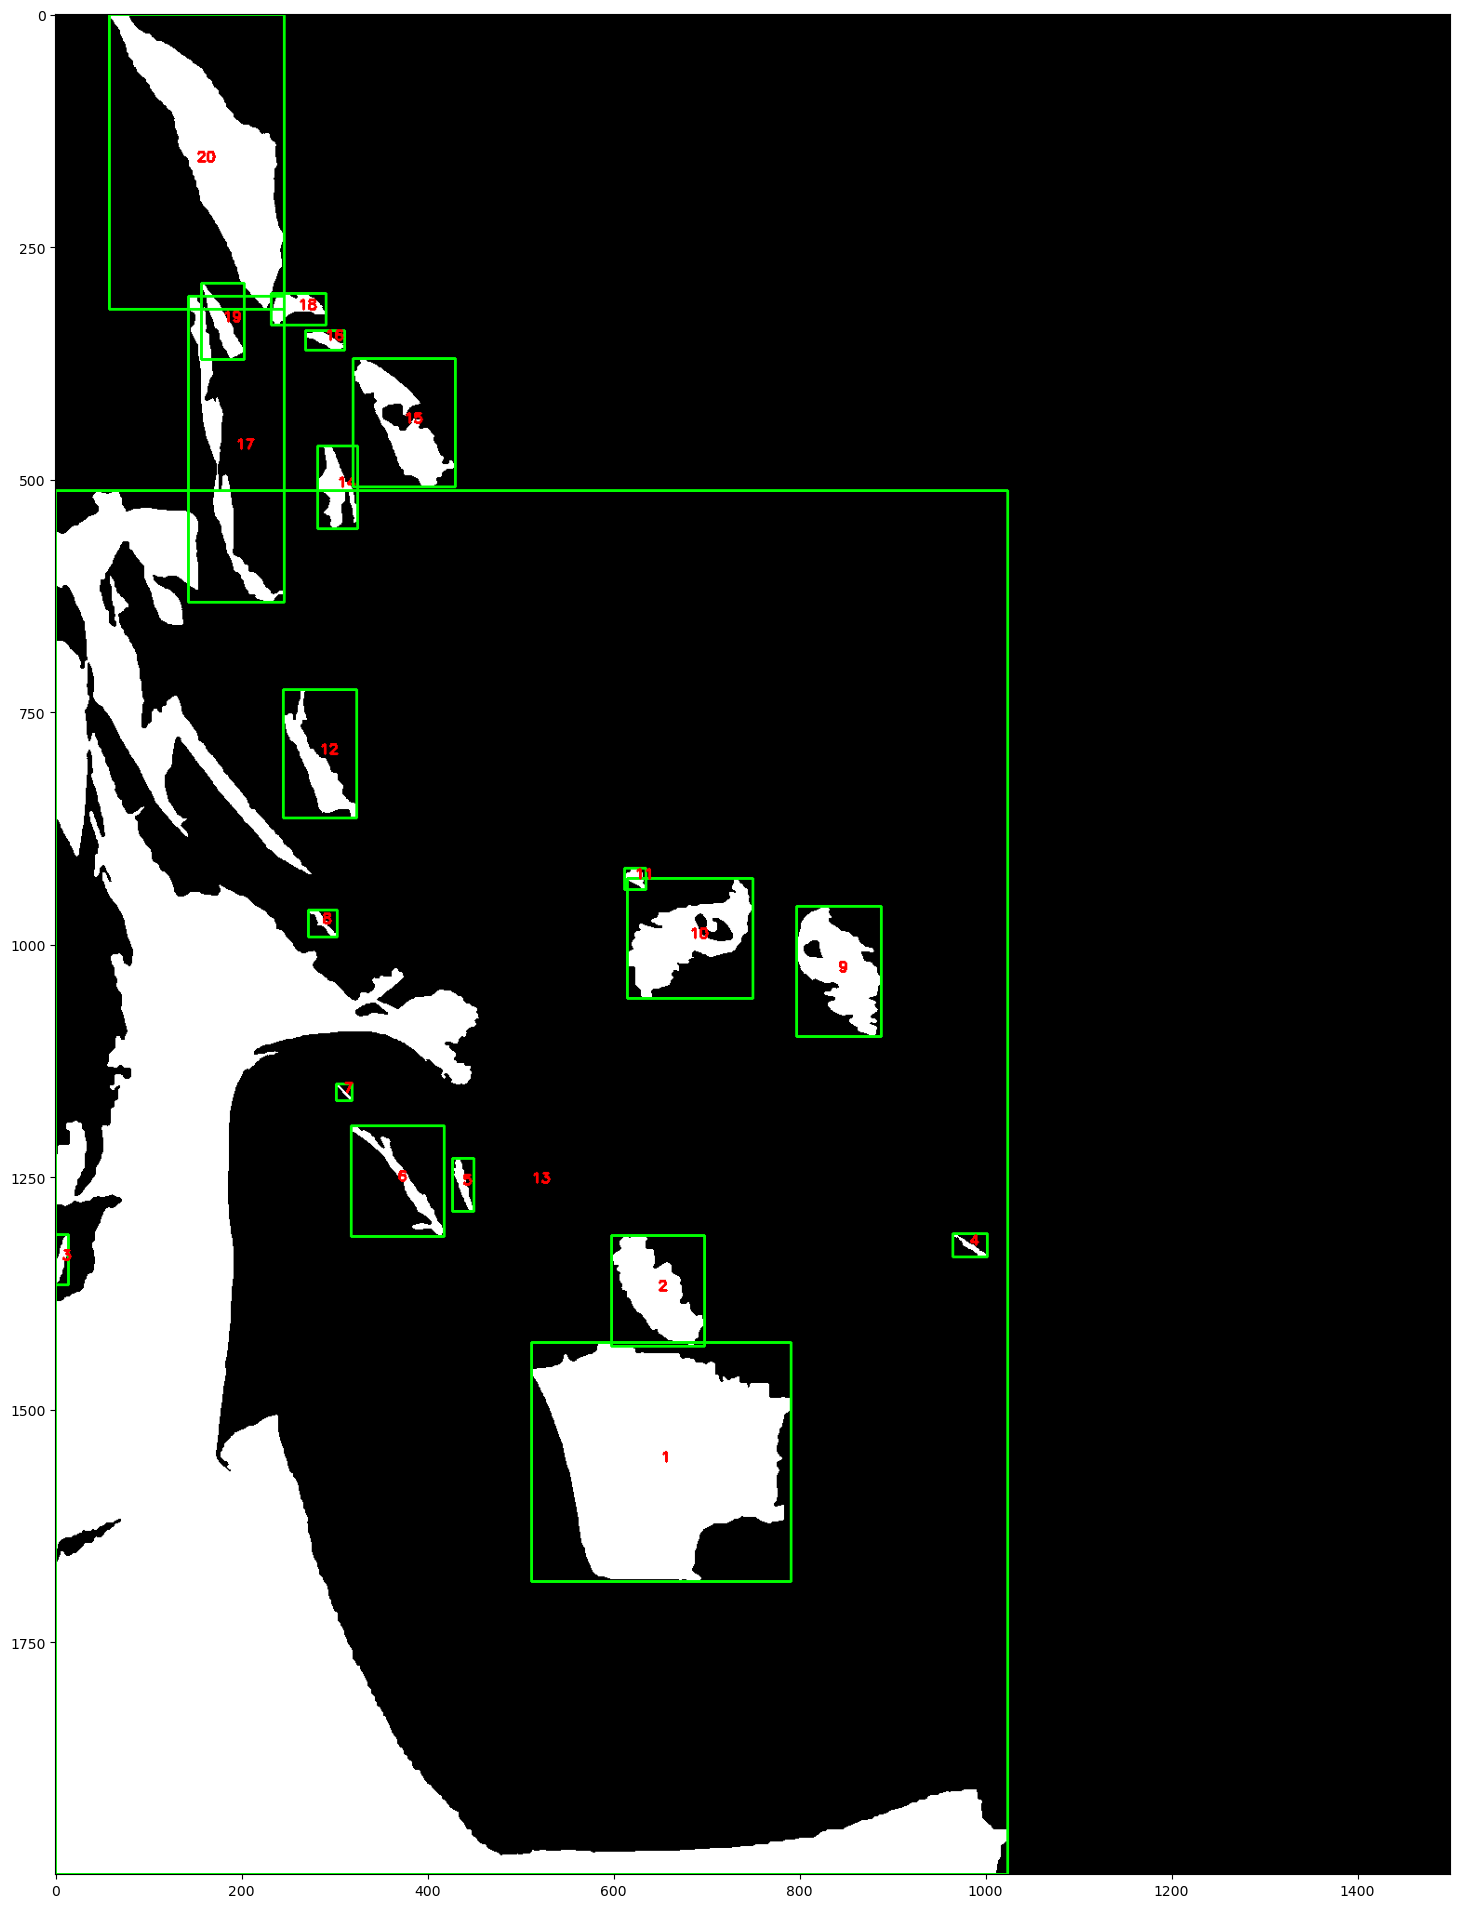

In [26]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Loop over all found contours
for i, contour in enumerate(contours):
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around each contour
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate coordinates for the text: placing numbers in the center of the bounding box
    cx, cy = x + w // 2, y + h // 2

    # Draw the index of the contour
    cv2.putText(output_image, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(18, 32))
plt.imshow(output_image)

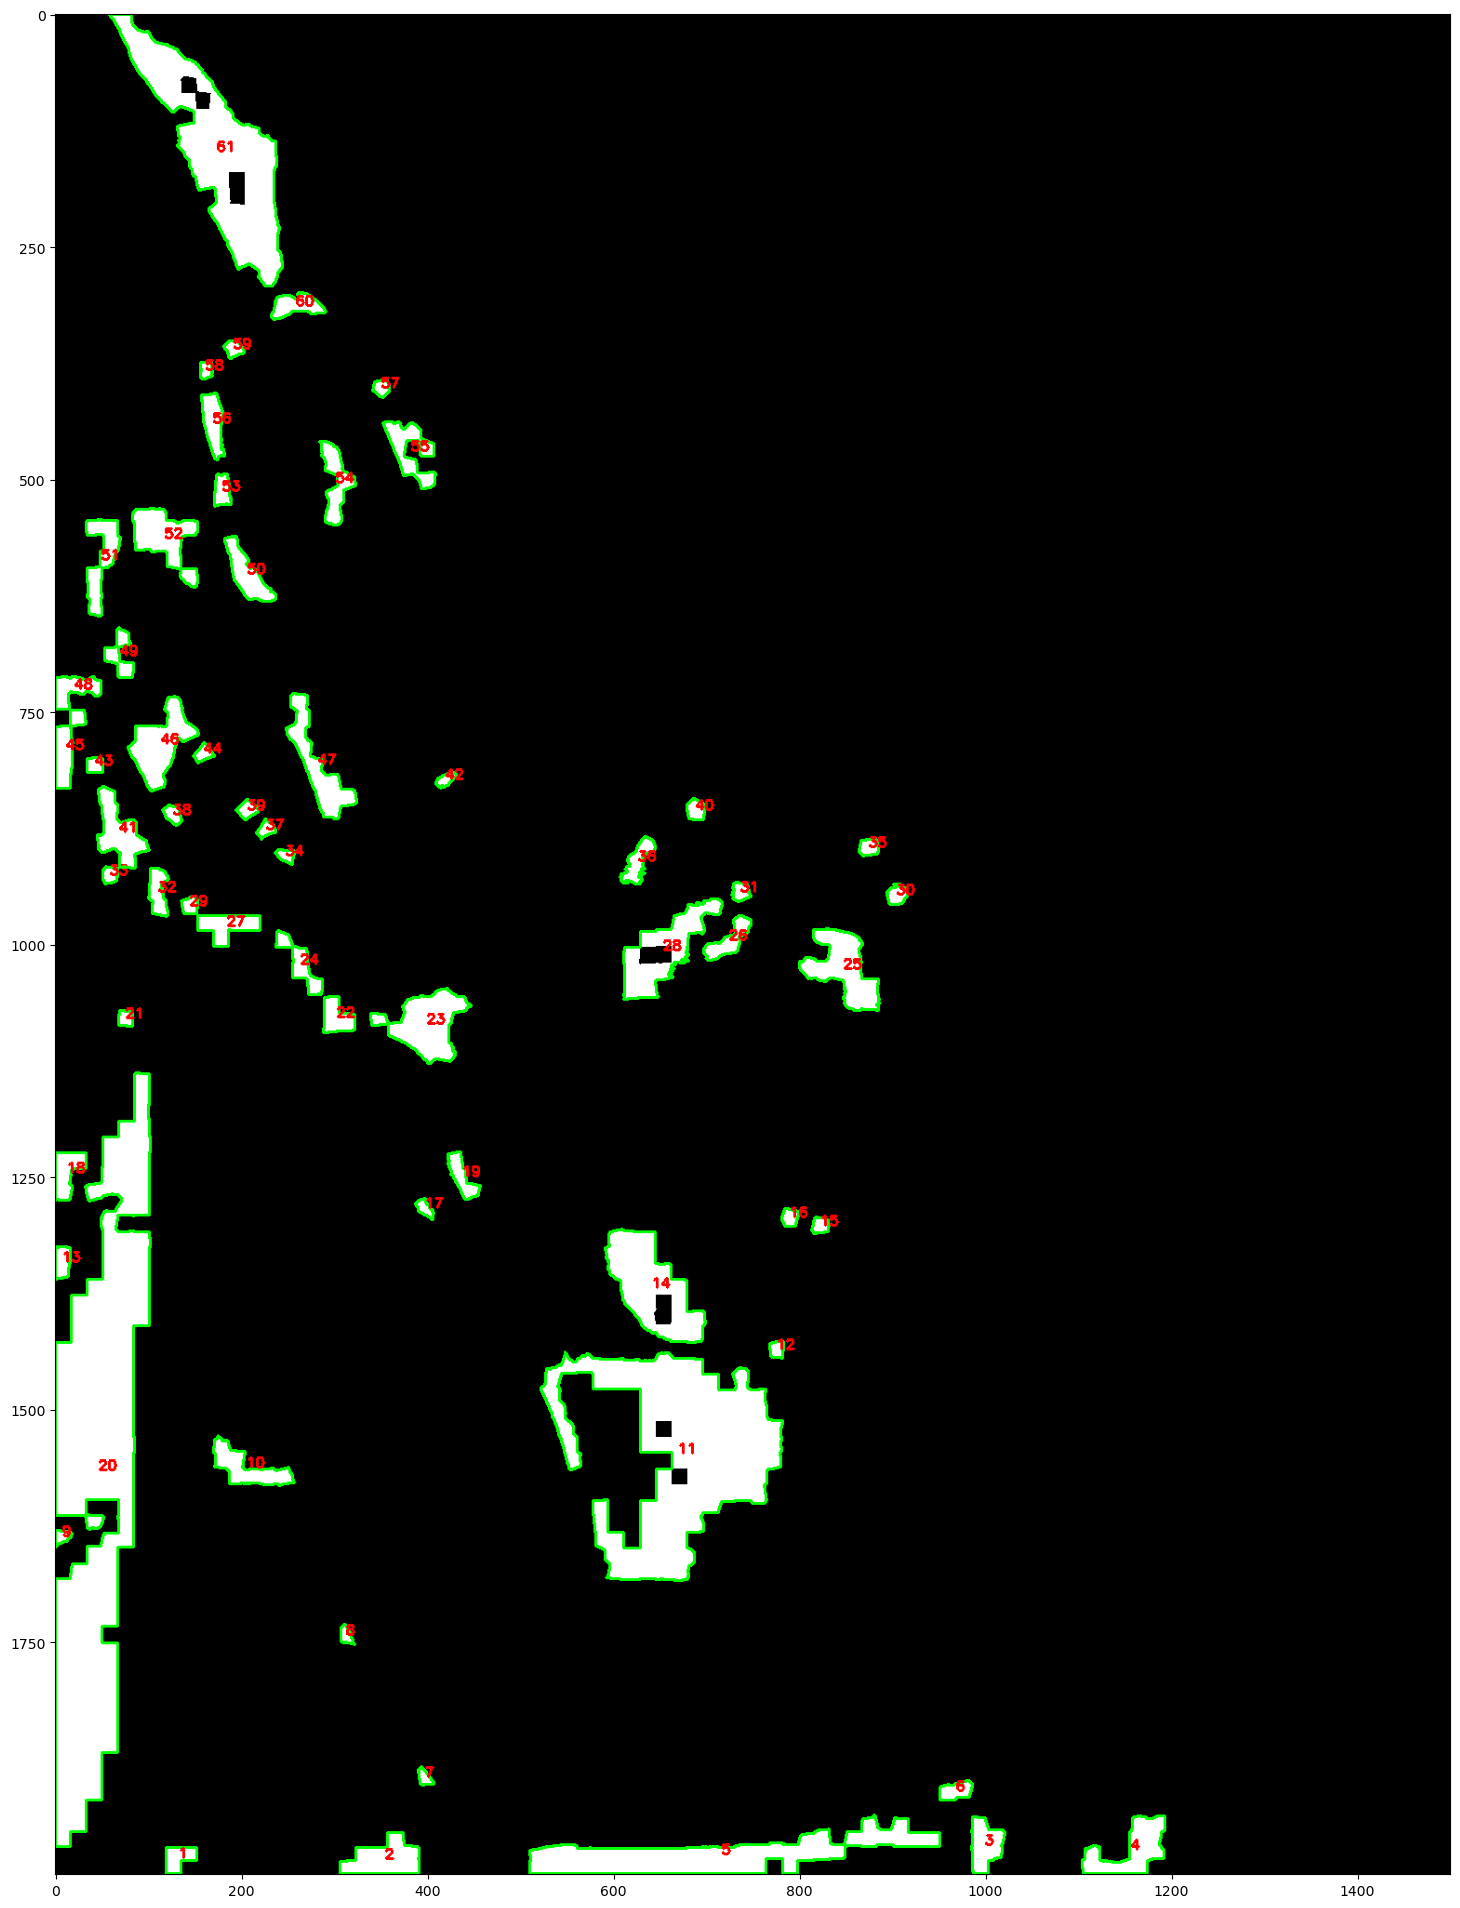

In [30]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Loop over all found contours
for i, contour in enumerate(contours):
    # Calculate moments for each contour
    M = cv2.moments(contour)

    if M["m00"] != 0:
        # Calculate x, y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        # Set some default values in case of error
        cX, cY = 0, 0

    # Draw the contour and center of the shape on the image
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)
    cv2.putText(output_image, str(i + 1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(18, 32))
plt.imshow(output_image)

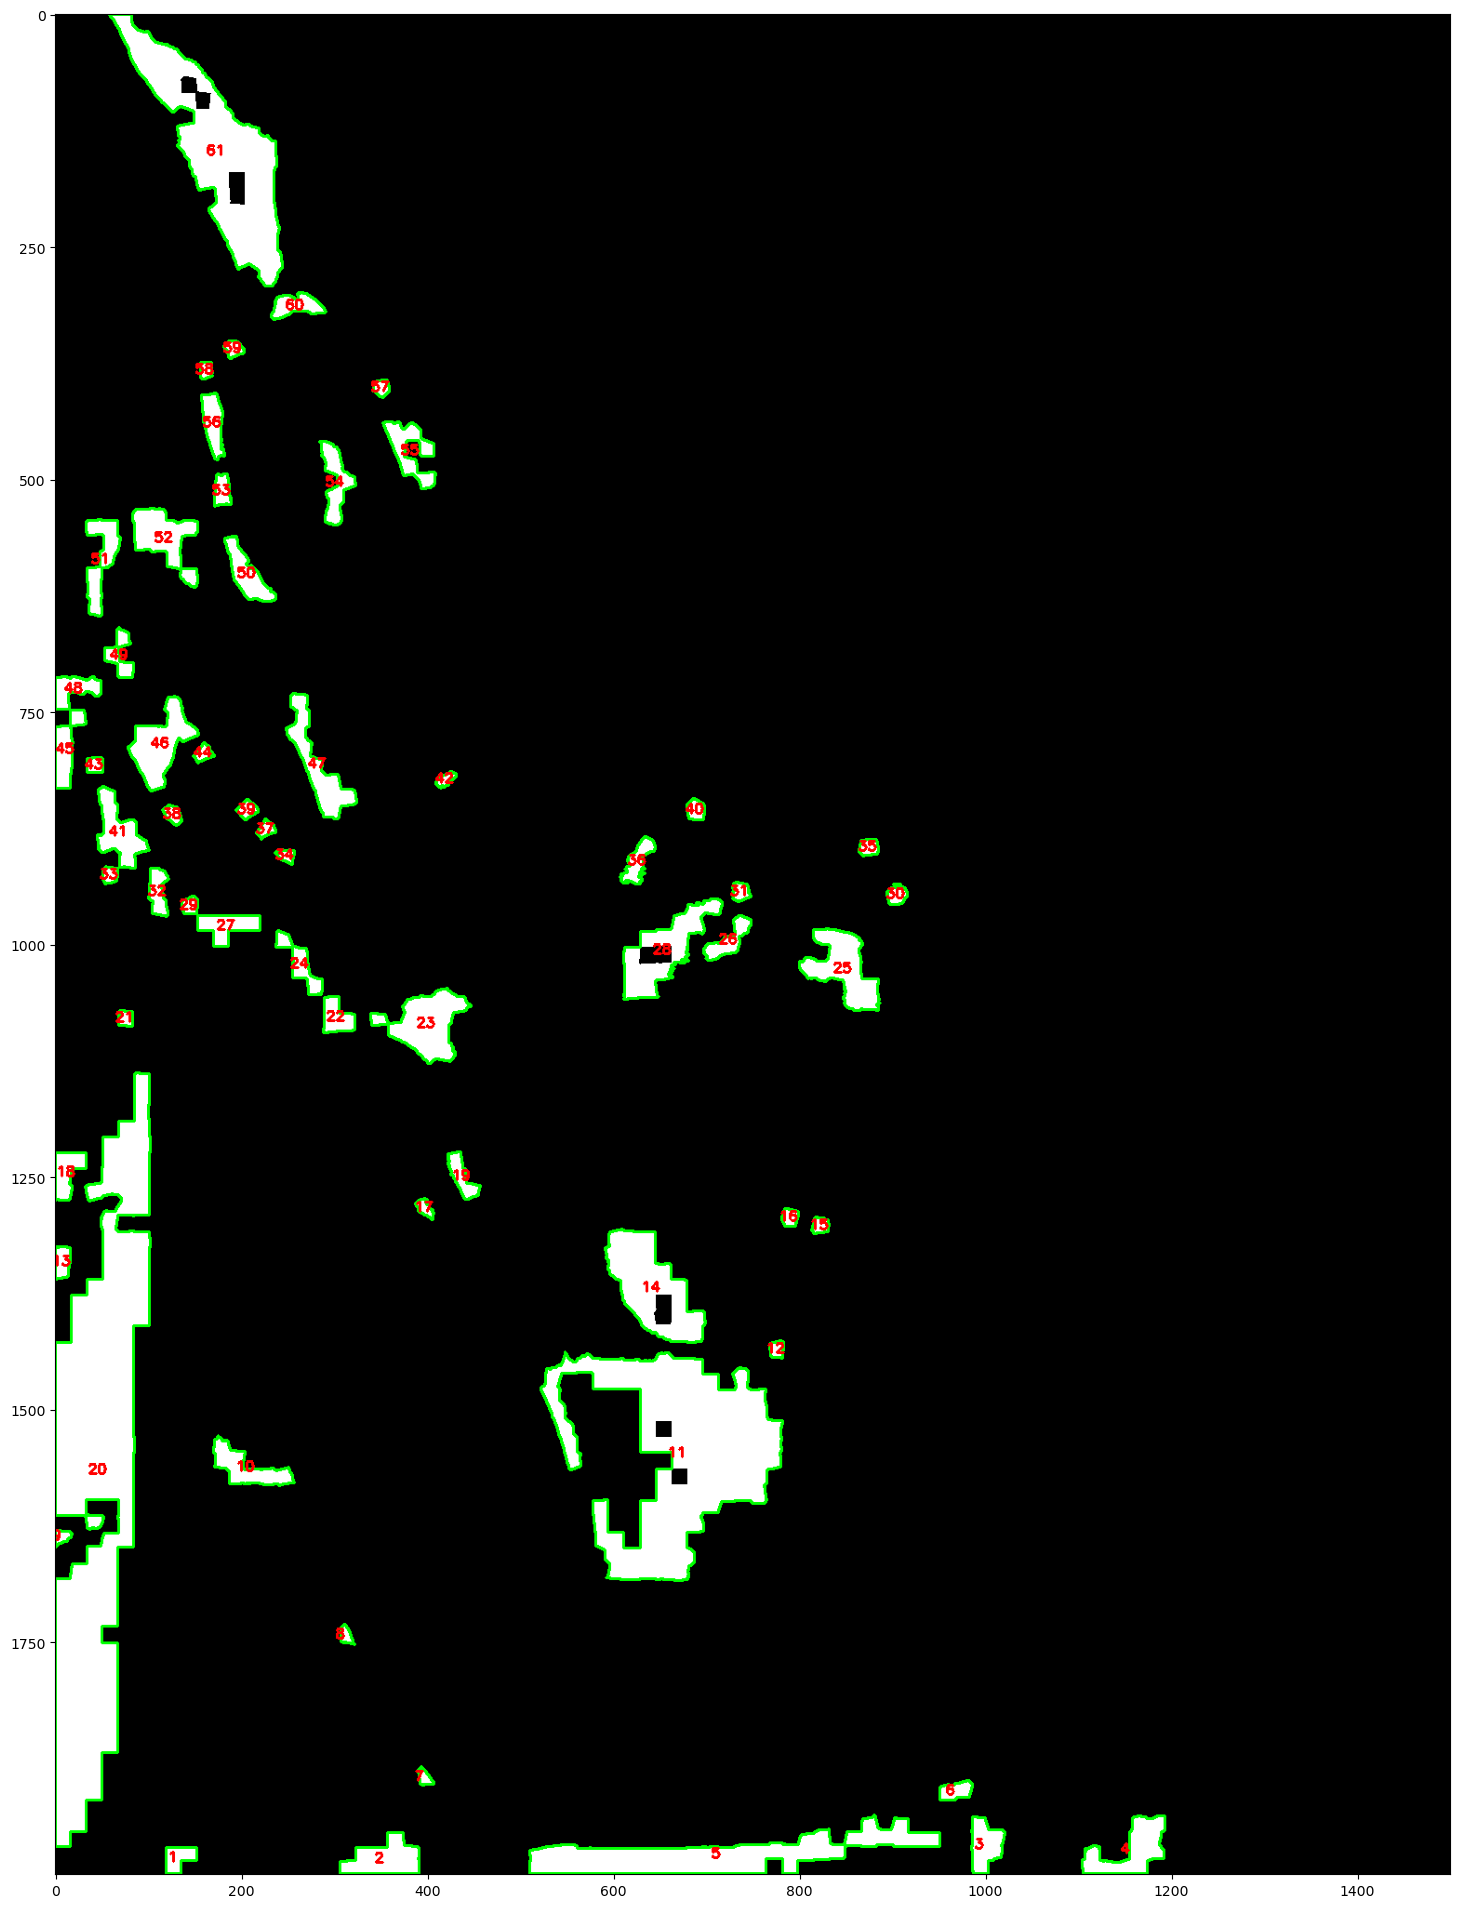

In [29]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Define the number of divisions for each contour area
num_divisions = 20  # Adjust this value as needed

# Loop over all found contours
for i, contour in enumerate(contours):
    # Calculate moments for each contour
    M = cv2.moments(contour)

    area = cv2.contourArea(contour)

    if M["m00"] != 0:
        # Calculate x, y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        # Set some default values in case of error
        cX, cY = 0, 0

    # Draw the contour on the output image
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

    # Calculate the size of each division
    area = cv2.contourArea(contour)
    division_area = area / num_divisions

    # Loop over each division
    for division in range(num_divisions):
        # Calculate the center of the current division
        division_center = (division + 0.5) * division_area / area
        division_contour = np.array([[
            [cX - division_center, cY - division_center],
            [cX + division_center, cY - division_center],
            [cX + division_center, cY + division_center],
            [cX - division_center, cY + division_center]
        ]], dtype=np.int32)

        # Calculate moments for each division
        division_M = cv2.moments(division_contour)

        if division_M["m00"] != 0:
            # Calculate x, y coordinate of center
            division_cX = int(division_M["m10"] / division_M["m00"])
            division_cY = int(division_M["m01"] / division_M["m00"])
        else:
            # Set some default values in case of error
            division_cX, division_cY = 0, 0

        # Draw the number at the center of the division
        cv2.putText(output_image, str(i + 1), (division_cX - 10, division_cY + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (255, 0, 0), 2)

plt.figure(figsize=(18, 32))
plt.imshow(output_image)

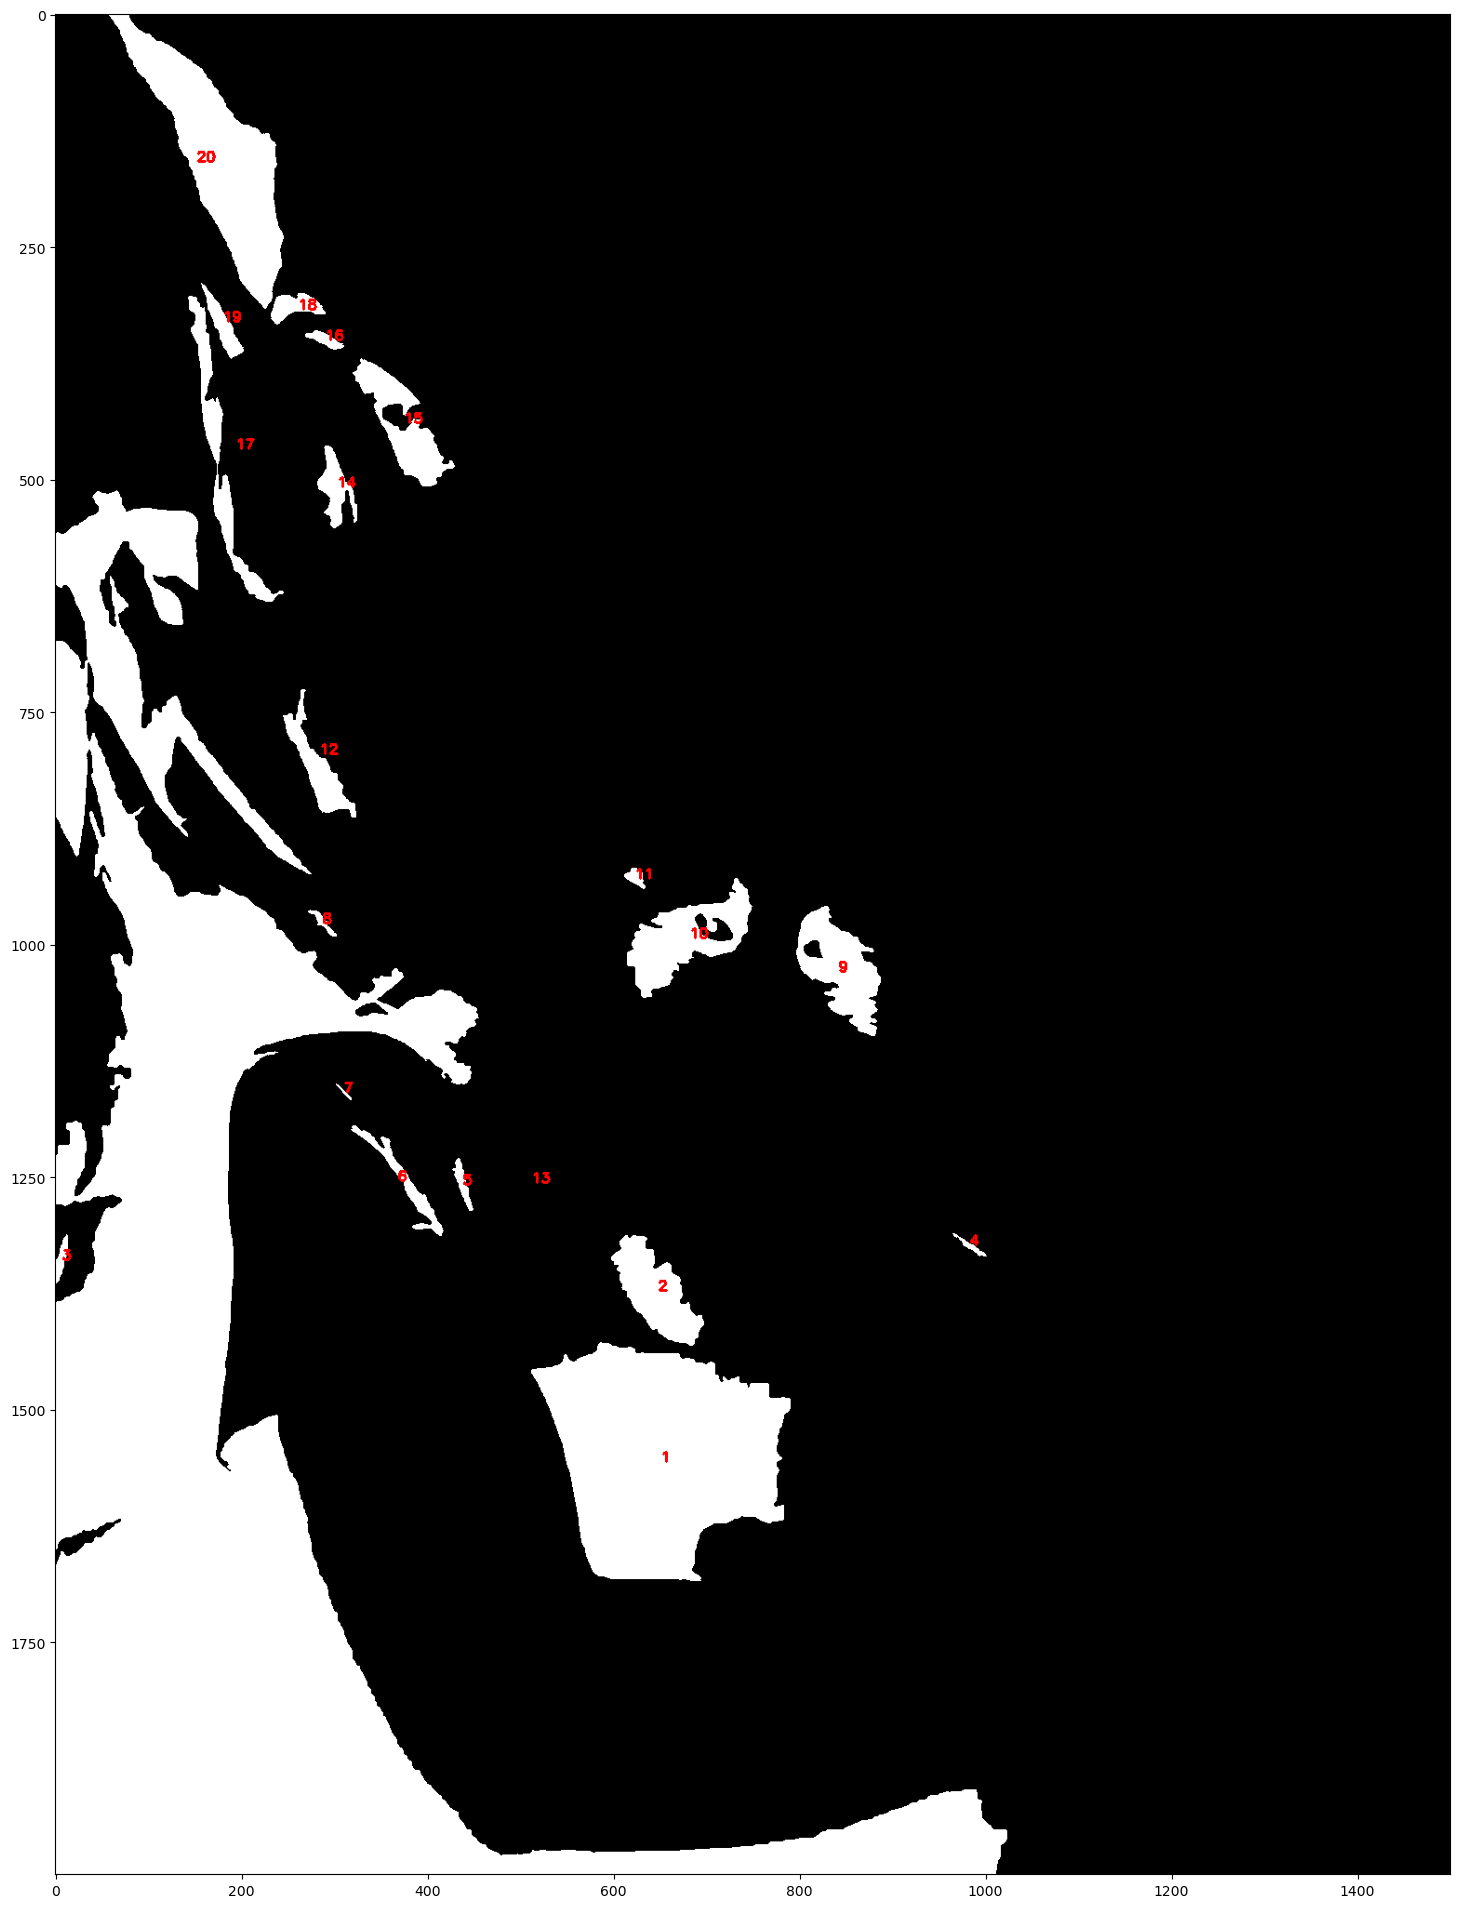

In [35]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a blank mask with the same size as the original mask
mask_with_numbers = np.zeros_like(mask)

# Loop over all found contours
for i, contour in enumerate(contours):
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate coordinates for the text: placing numbers in the center of the bounding box
    cx, cy = x + w // 2, y + h // 2

    # Draw the index of the contour on the blank mask
    cv2.putText(mask_with_numbers, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 2)

    # Draw the index of the contour on the output image
    cv2.putText(output_image, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Divide the contour area into a grid and place numbers at the center of each grid cell
    num_rows, num_cols = 3, 3  # Adjust as needed
    cell_width = w // num_cols
    cell_height = h // num_rows
    cell_counter = 0

    for r in range(num_rows):
        for c in range(num_cols):
            # Calculate the center of the current grid cell
            cell_cx = x + c * cell_width + cell_width // 2
            cell_cy = y + r * cell_height + cell_height // 2

            # Draw the number in the current grid cell
            cv2.putText(mask_with_numbers, str(cell_counter + 1), (cell_cx, cell_cy), cv2.FONT_HERSHEY_SIMPLEX, 0.3,
                        255, 1)

            # Increment cell counter
            cell_counter += 1

# Perform bitwise AND operation to ensure numbers only appear within the masked areas
masked_numbers = cv2.bitwise_and(mask_with_numbers, mask)

plt.figure(figsize=(18, 32))
plt.imshow(output_image)

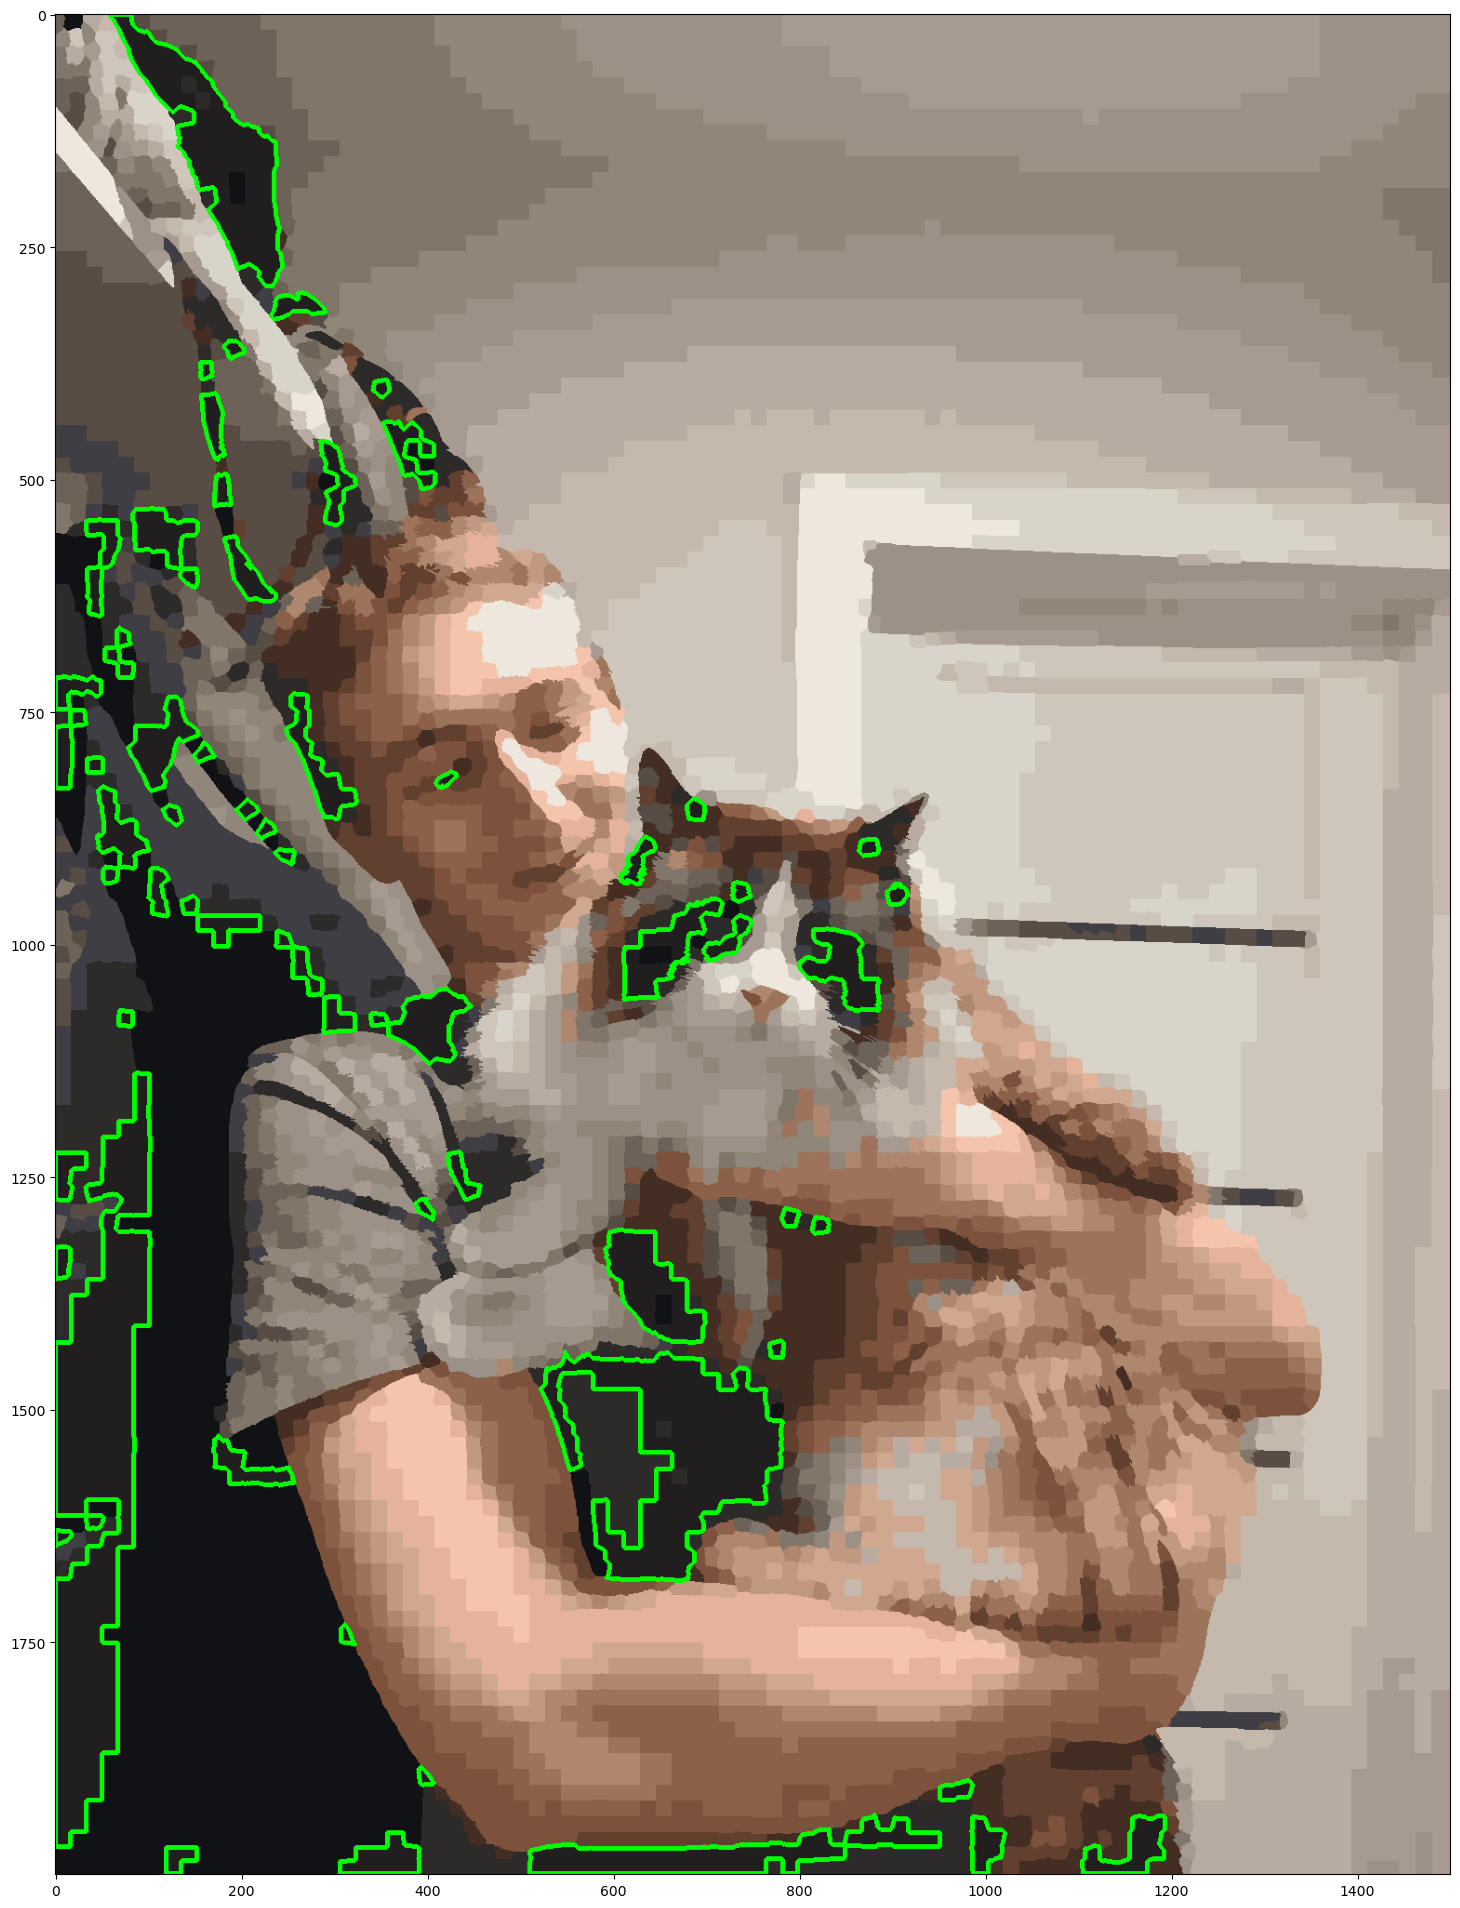

In [26]:
im = cv2.drawContours(result_image, contours, -1, (0, 255, 0), 3)
plt.figure(figsize=(18, 32))
plt.imshow(im)